Imports e função de histograma RGB:

In [2]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def histogram_gray(channel):
    channel = (channel * 255).astype(np.uint8)
    hist = np.zeros(256, dtype=int)
    for pixel_value in channel.flatten():
        hist[pixel_value] += 1
    return hist

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis("off")
    plt.title("Imagem Original")
    
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red', alpha=0.6, label='Red')
    plt.bar(range(256), histogram_g, color='green', alpha=0.6, label='Green')
    plt.bar(range(256), histogram_b, color='blue', alpha=0.6, label='Blue')
    plt.title("Histograma RGB")
    plt.xlabel("Intensidade do Pixel")
    plt.ylabel("Frequência")
    plt.legend()
    plt.show()


Carregar e redimensionar as imagens:

In [ ]:
def load_image(path):
    img = Image.open(path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    return img

img1 = load_image(r"C:\Users\marcu\Desktop\JooJs\Projeto 1\P1.png")
img2 = load_image(r"C:\Users\marcu\Desktop\JooJs\Projeto 1\P2.png")
img3 = load_image(r"C:\Users\marcu\Desktop\JooJs\Projeto 1\P3.jpg")
img4 = load_image(r"C:\Users\marcu\Desktop\JooJs\Projeto 1\P4.png")

max_width = max(img1.width, img2.width, img3.width, img4.width)
max_height = max(img1.height, img2.height, img3.height, img4.height)

img1 = img1.resize((max_width, max_height))
img2 = img2.resize((max_width, max_height))
img3 = img3.resize((max_width, max_height))
img4 = img4.resize((max_width, max_height))


Pré-processamento das imagens e Junção das 4 (Exercício 1):

In [5]:
ft1 = np.array(img1).astype(np.float64) / 255
ft2 = np.array(img2).astype(np.float64) / 255
ft3 = np.array(img3).astype(np.float64) / 255
ft4 = np.array(img4).astype(np.float64) / 255

cima = np.hstack((ft1, ft2))
baixo = np.hstack((ft3, ft4))
juncao = np.vstack((cima, baixo))


In [ ]:
Trocar cores para Ciano (Exercício 2):

In [ ]:
branco = np.all(juncao > [177/255, 177/255, 177/255], axis=-1) # Ignorando o fundo branco
preto = np.all(juncao < [30/255, 30/255, 30/255], axis=-1) # Ignorando o traço do pinguim

juncao_ciano = juncao.copy()
ciano = np.array([0, 255, 255]) / 255 # Ciano
juncao_ciano[~branco & ~preto] = ciano


Espelhando imagem (Exercício 3):

In [7]:
imagem_espelhada = cv2.flip(juncao_ciano, 1)

altura, largura, _ = ft3.shape
x1, y1 = largura // 5, altura // 10
x2, y2 = 3 * largura // 5, 3 * altura // 5

pinguim_recortado = ft3[y1:y2, x1:x2]
pinguim_recortado_uint8 = (pinguim_recortado * 255).astype(np.uint8)


Mostrando o Histograma da imagem 3, escolhendo threshold e aplicando a conversão para a cor escolhida (Exercícios 4, 5 e 6):

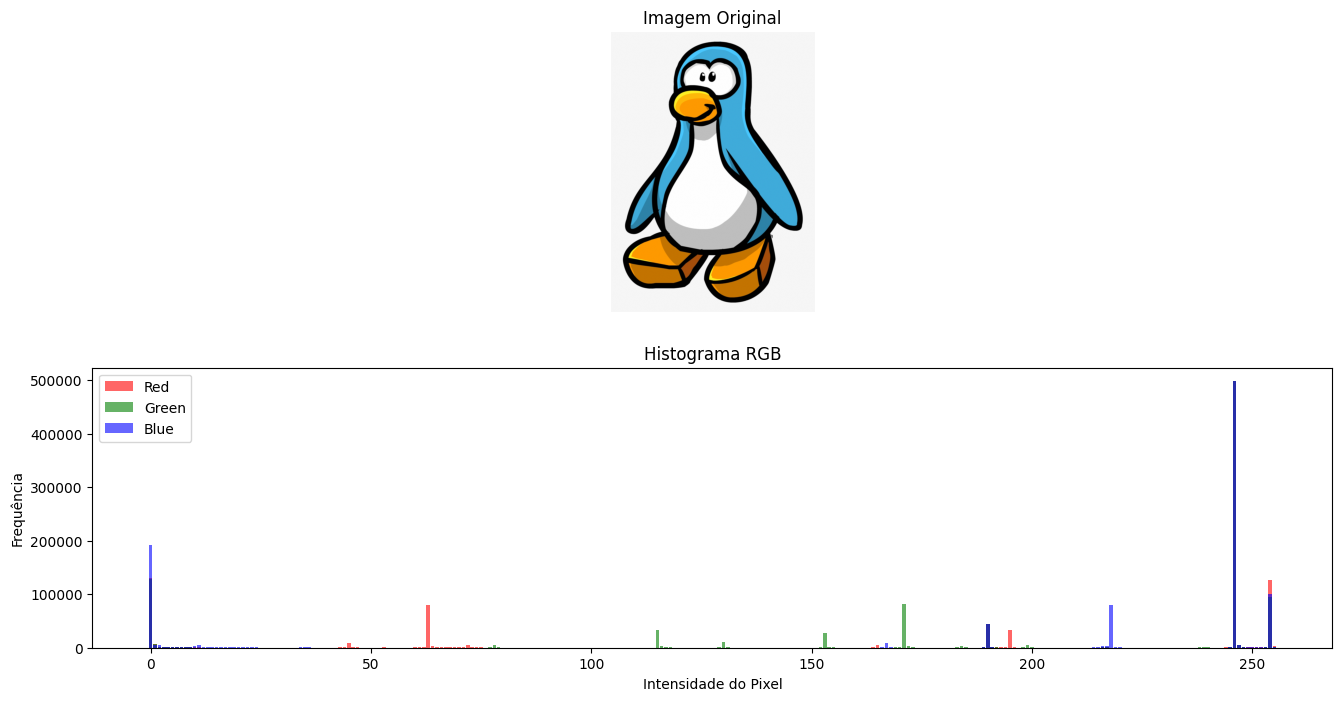

In [ ]:
show_histogram(ft3)

cinza = cv2.cvtColor(pinguim_recortado_uint8, cv2.COLOR_RGB2GRAY)
threshold = 230 # Para manter a barriga, olhos e fundo branco, alterando apenas o corpo do pinguim em si

pinguim_modificado = pinguim_recortado.copy()
pinguim_modificado[cinza < threshold] = [0, 255, 255]


Mostrando as imagens:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


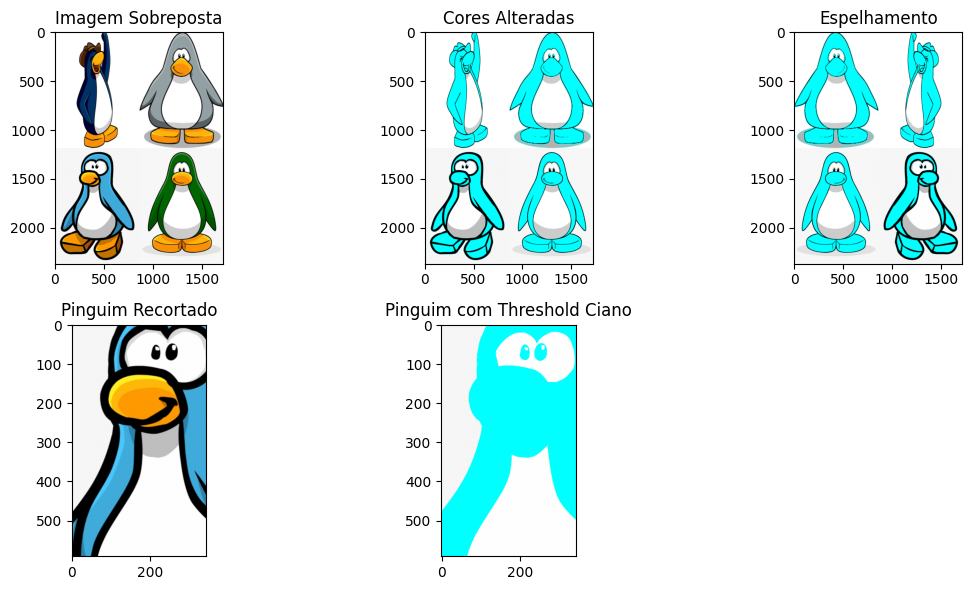

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(juncao)
plt.title("Imagem Sobreposta")

plt.subplot(2, 3, 2)
plt.imshow(juncao_ciano)
plt.title("Cores Alteradas")

plt.subplot(2, 3, 3)
plt.imshow(imagem_espelhada)
plt.title("Espelhamento")

plt.subplot(2, 3, 4)
plt.imshow(pinguim_recortado)
plt.title("Pinguim Recortado")

plt.subplot(2, 3, 5)
plt.imshow(pinguim_modificado)
plt.title("Pinguim com Threshold Ciano")

plt.tight_layout()
plt.show()
